Ejercicio Práctico: Análisis de
Datos Biosanitarios con Docker,
NumPy, Pandas y Matplotlib
Descripción del ejercicio
En este ejercicio, los alumnos crearán un entorno de Data Science usando
Docker, donde analizarán datos de pacientes ficticios mediante NumPy, Pandas y
Matplotlib.
El flujo de trabajo incluye:
✅ Contenerización de Jupyter con las bibliotecas necesarias.
✅ Generación de datos de pacientes con NumPy.
✅ Análisis de datos biosanitarios con Pandas.
✅ Visualización de resultados con Matplotlib.
✅ Publicación del contenedor en Docker Hub para compartir su trabajo.

1. Preparación del entorno
1. Crea el directorio del proyecto con la siguiente estructura:
mi_proyecto_biosanitario/
├── notebooks/ # Para los notebooks de Jupyter
├── data/ # Para guardar datasets
├── results/ # Para almacenar gráficos y análisis
├── docker-compose.yml
├── Dockerfile
└── requirements.txt
2. Edita requirements.txt para incluir las bibliotecas necesarias:
2. Creación del Dockerfile
Dentro del directorio, crea un Dockerfile con el siguiente contenido:
3. Configuración de docker-compose.yml
Modifica el archivo docker-compose.yml para incluir el uso del Dockerfile
creado:
4. Creación del Notebook
"análisis_pacientes.ipynb"
Dentro de la carpeta notebooks, los alumnos deben crear un archivo Jupyter que
incluya el siguiente análisis:
Generación de datos biosanitarios con NumPy
Los alumnos deben generar un dataset de pacientes ficticios con NumPy:

In [1]:
import numpy as np
import pandas as pd
import os

# Número de pacientes
np.random.seed(42)
num_pacientes = 1000

os.makedirs("/home/jovyan/results", exist_ok=True) # esto es para crear el directorio si no existe

# Generación de datos con NumPy
data = {
    "ID_Paciente": np.arange(1, num_pacientes + 1),
    "Edad": np.random.randint(18, 90, num_pacientes),
    "Peso (kg)": np.round(np.random.normal(70, 15, num_pacientes), 2),# el dos es que redondee a 2 decimales
    "Altura (cm)": np.round(np.random.normal(170, 10, num_pacientes), 2),#(media,desviación,num pacientes)
    "Presión Sistólica": np.random.randint(90, 180, num_pacientes),
    "Presión Diastólica": np.random.randint(60, 110, num_pacientes),
    "Frecuencia Cardíaca": np.random.randint(50, 120, num_pacientes)
}

# Crear DataFrame 
df_pacientes = pd.DataFrame(data)

# Guardar el dataset en un archivo CSV dentro del volumen persistente
ruta_data = "datos_pacientes.csv"
df_pacientes.to_csv(ruta_data, index=False)

print(f"Datos de pacientes guardados en {ruta_data}")

# Mostrar las primeras filas del DataFrame
df_pacientes.head()

Datos de pacientes guardados en datos_pacientes.csv


,ID_Paciente,Edad,Peso (kg),Altura (cm),Presión Sistólica,Presión Diastólica,Frecuencia Cardíaca
0,1,69,66.15,174.47,156,96,56
1,2,32,85.36,157.86,124,77,89
2,3,89,45.66,189.44,104,83,119
3,4,78,75.11,153.77,105,73,114
4,5,38,70.38,177.96,102,93,117


5. Análisis de datos con Pandas
Los alumnos deben leer los datos desde el CSV y analizar la distribución de
variables relevantes:
 Cargar los datos
/pacientes.csv')
Ver primeras filas
Estadísticas descriptivas
 Identificar posibles hipertensos (Presión Sistólica > 140 o Diastólica > 90)
 Guardar los resultados

In [2]:
# Cargar los datos desde el CSV
ruta_data = "datos_pacientes.csv"  
df = pd.read_csv(ruta_data)

# Ver las primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Obtener estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Identificar posibles hipertensos
df["Hipertenso"] = (df["Presión Sistólica"] > 140) | (df["Presión Diastólica"] > 90)

# Mostrar cuántos pacientes podrían ser hipertensos
num_hipertensos = df["Hipertenso"].sum()
print(f"\nNúmero de posibles hipertensos: {num_hipertensos}")

# Guardar los resultados en un nuevo archivo CSV
ruta_resultados = "/home/jovyan/results/resultados_pacientes.csv"
df.to_csv(ruta_resultados, index=False)

print(f"\nResultados guardados en: {ruta_resultados}")

Primeras filas del dataset:
   ID_Paciente  Edad  Peso (kg)  Altura (cm)  Presión Sistólica  \
0            1    69      66.15       174.47                156   
1            2    32      85.36       157.86                124   
2            3    89      45.66       189.44                104   
3            4    78      75.11       153.77                105   
4            5    38      70.38       177.96                102   

   Presión Diastólica  Frecuencia Cardíaca  
0                  96                   56  
1                  77                   89  
2                  83                  119  
3                  73                  114  
4                  93                  117  

Estadísticas descriptivas:
       ID_Paciente         Edad    Peso (kg)  Altura (cm)  Presión Sistólica  \
count  1000.000000  1000.000000  1000.000000  1000.000000        1000.000000   
mean    500.500000    52.881000    70.937320   170.411770         135.228000   
std     288.819436    20.958915

6. Visualización de datos con Matplotlib
Los alumnos deben crear gráficos para interpretar los datos:
 
 Histograma de edades

plt.figure(figsize=(8,5))
plt.hist()
plt.xlabel()
plt.ylabel("Número de Pacientes")
plt.title("Distribución de Edades de los Pacientes")
plt.grid()
plt.savefig()
plt.show()

 Relación entre peso y altura
 
plt.figure(figsize=(8,5))
plt.scatter()
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.title("Relación entre Altura y Peso")
plt.grid()
plt.savefig()
plt.show()

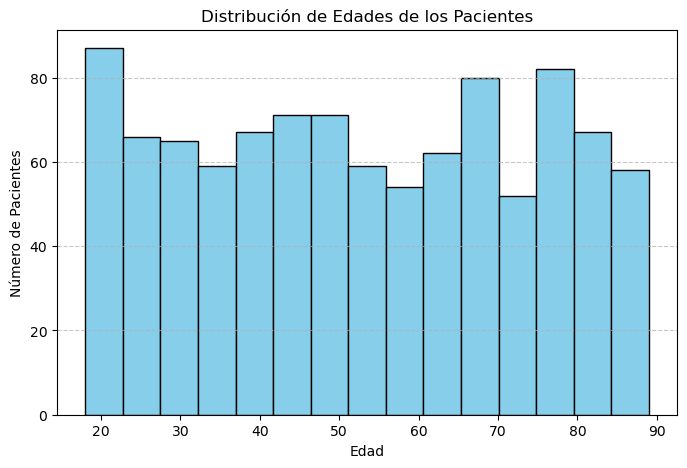

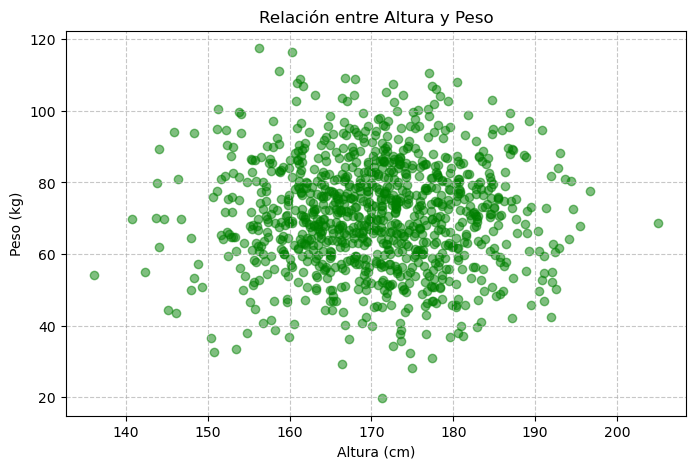

In [3]:

import matplotlib.pyplot as plt

# Cargar los datos desde el CSV
ruta_data = "datos_pacientes.csv"
df_pacientes = pd.read_csv(ruta_data)

# 📌 1. Histograma de edades
plt.figure(figsize=(8, 5))
plt.hist(df["Edad"], bins=15, color="skyblue", edgecolor="black")
plt.xlabel("Edad")
plt.ylabel("Número de Pacientes")
plt.title("Distribución de Edades de los Pacientes")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Guardar el histograma como imagen
plt.savefig("/home/jovyan/results/histograma_edades.png")
plt.show()

# 📌 2. Relación entre peso y altura (Gráfico de dispersión)
plt.figure(figsize=(8, 5))
plt.scatter(df["Altura (cm)"], df["Peso (kg)"], color="green", alpha=0.5)
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.title("Relación entre Altura y Peso")
plt.grid(True, linestyle="--", alpha=0.7)

# Guardar el gráfico como imagen
plt.savefig("/home/jovyan/results/relacion_peso_altura.png")
plt.show()